In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
flight = 4

In [3]:
basedir = 'data/P3_2017/LGS'
infile = 'OIB_P3_F200' + str(flight) + '_exportfromGeosoft.csv'
# infile = 'OIB_P3_F2001_exportfromGeosoft.csv'
# infile = 'OIB_P3_F2004_exportfromGeosoft.csv'


df = pd.read_csv(os.path.join(basedir, infile))
df.head()

,Line,AccBiasX,AccBiasY,AccBiasZ,AccBiasZ_mgal,Corrected_Free_Air_DgS,diff_att_noatt,diff_oib_grav4,diff_oib_grav4_70,diff_oib_grav4_70_clip,...,Pitch,Roll,seconds,static_en,static_st,unixtime,UTCDate,x,y,zbias_corr
0,D2004,0.001061,-0.000818,0.000148,14.802300,135.075,-6.467250,-4.754357,-5.951157,-5.951157,...,2.716135,0.997376,39704,15,10.6,1490612504,2017/03/27,-589235.774464,-1.341858e+06,9.202300
1,D2004,0.001062,-0.000807,0.000150,15.046800,135.476,-10.193762,-1.134118,-5.434893,-5.434893,...,4.029933,1.909525,39705,15,10.6,1490612505,2017/03/27,-589311.512068,-1.341833e+06,9.446630
2,D2004,0.001064,-0.000797,0.000151,15.149900,135.846,-12.889311,2.047225,-4.475575,-4.475575,...,5.115871,2.401810,39706,15,10.6,1490612506,2017/03/27,-589387.817282,-1.341808e+06,9.549560
3,D2004,0.001063,-0.000790,0.000153,15.250299,136.185,-13.240284,2.768039,-3.642870,-3.642870,...,5.095973,2.711225,39707,15,10.6,1490612507,2017/03/27,-589464.406190,-1.341782e+06,9.649790
4,D2004,0.001063,-0.000784,0.000155,15.533800,136.491,-10.489346,0.086192,-2.936101,-2.936101,...,4.105128,2.071890,39708,15,10.6,1490612508,2017/03/27,-589541.265709,-1.341756e+06,9.933121


In [4]:
df.keys()

Index(['Line', 'AccBiasX', 'AccBiasY', 'AccBiasZ', 'AccBiasZ_mgal',
       'Corrected_Free_Air_DgS', 'diff_att_noatt', 'diff_oib_grav4',
       'diff_oib_grav4_70', 'diff_oib_grav4_70_clip', 'diff_oib_grav4_70_corr',
       'diff_oib_grav4_clip', 'diff_oib_zbias', 'diff_oib_zbias_clip', 'drift',
       'drift_correction', 'duration', 'Ellipsoidal_height', 'Free_Air_DgS',
       'grav', 'grav4', 'grav4_70', 'grav4_70_st', 'grav_4_70_corr',
       'grav_4_corr', 'H_Ell', 'Heading', 'hms', 'imu_temp_C', 'increment',
       'Latitude', 'Longitude', 'NS', 'oib_10_11_12', 'PDOP', 'Pitch', 'Roll',
       'seconds', 'static_en', 'static_st', 'unixtime', 'UTCDate', 'x', 'y',
       'zbias_corr'],
      dtype='object')

In [5]:
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df = df.set_index(pd.to_datetime(df['unixtime'],unit='s'))

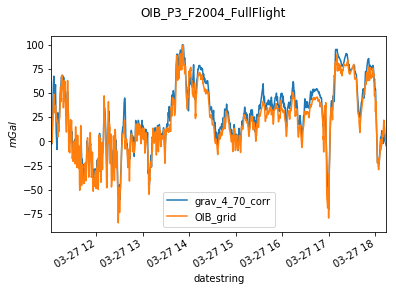

In [41]:
fig, ax = plt.subplots(facecolor='white')
ln1 = df['grav_4_70_corr'].plot()
ln2 = df['oib_10_11_12'].plot(label='OIB_grid')
ax.set_ylabel('$mGal$')
plt.legend()
plt.suptitle(infile[:12] + '_FullFlight')
plt.savefig('figs/' + infile[:12] + '_Grav_iMAR-vs-OIB__FullFlight.png')

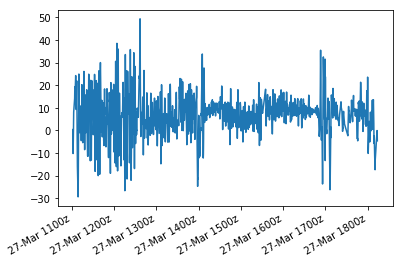

In [42]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
plt.plot(df['grav_4_70_corr'] - df['oib_10_11_12'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H%Mz'))
fig.autofmt_xdate()

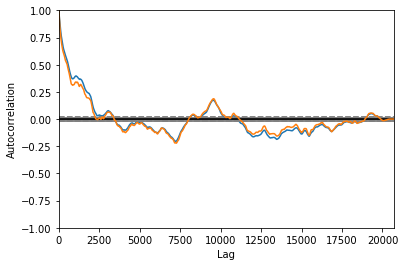

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['grav4'])
# autocorrelation_plot(df['grav_4_70_corr'])
autocorrelation_plot(df['oib_10_11_12'])
# plt.legend()
plt.show()

Text(0,0.5,'$^{\\circ}C$')

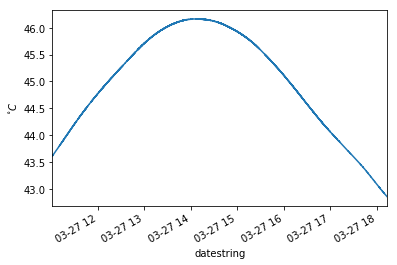

In [43]:
fig, ax = plt.subplots(facecolor='white')
df['imu_temp_C'].plot()
ax.set_ylabel('$^{\circ}C$')

In [10]:
if flight == 1:
    # F001
    begin_line = datetime(2017, 3, 22, 13, 18)
    end_line = datetime(2017, 3, 22, 13, 52)
elif flight == 4:
    # F004
    begin_line = datetime(2017, 3, 27, 15, 35)
    end_line = datetime(2017, 3, 27, 16, 50)
else:
    begin_line = df.index[0]
    end_line = df.index[-1]
    print("no flight")

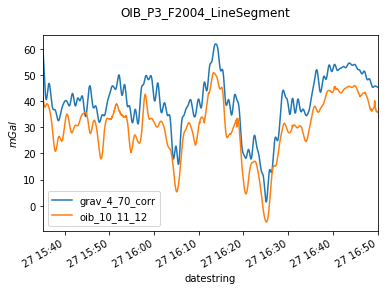

In [44]:
fig, ax = plt.subplots(facecolor='white')
# gravity = gravity[(begin_line <= gravity.index) & (gravity.index <= end_line)]
df[['grav_4_70_corr', 'oib_10_11_12']].loc[begin_line: end_line].plot(ax=ax)
ax.set_ylabel('$mGal$')
plt.suptitle(infile[:12] + '_LineSegment')
plt.savefig('figs/' + infile[:12] + '_Grav_iMAR-vs-OIB_LineSegment.png')

In [12]:
df['imar_bias'] = df['grav_4_70_corr'] - df['oib_10_11_12']

Text(0,0.5,'$mGal$')

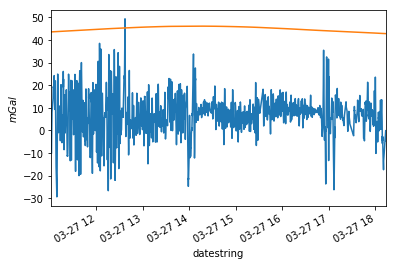

In [45]:
fig, ax = plt.subplots(facecolor='white')
# df['imar_bias'].loc[begin_line: end_line].plot()
df['imar_bias'].plot()
df['imu_temp_C'].plot()
ax.set_ylabel('$mGal$')



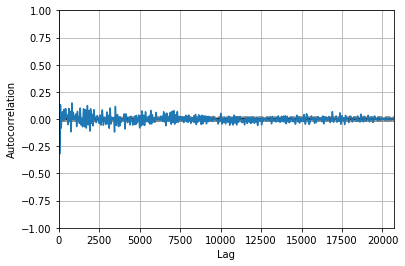

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['imar_bias'])
plt.show()

## LOWESS
Need to adjust "frac" in the lowess module to get a compatible, linear relationship.

In [15]:
from scipy.interpolate import interp1d
import statsmodels.api as sm

# introduce some floats in our x-values
x = df['unixtime']
y = df['imar_bias']

# lowess will return our "smoothed" data with a y value for at every x-value
my_frac = 0.6
lowess = sm.nonparametric.lowess(y, x, frac=my_frac)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

# # run scipy's interpolation. There is also extrapolation I believe
# f = interp1d(lowess_x, lowess_y, bounds_error=False)

# xnew = [i/10. for i in range(4000000)]

# # this this generate y values for our xvalues by our interpolator
# # it will MISS values outsite of the x window (less than 3, greater than 33)
# # There might be a better approach, but you can run a for loop
# #and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
# ynew = f(xnew)
# # df['imar_bias_lowess'] = lowess_y

/Users/dporter/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
# df_temp['imar_bias_lowess'] = np.squeeze(lowess_y)
data=np.array([lowess_x, lowess_y]).T
lowess_index = pd.to_datetime(lowess_x,unit='s')
df_lowess = pd.DataFrame(data=data, index=lowess_index, columns=['unixtime','imar_bias_lowess'])
df_lowess.head()

# df['imar_bias_lowess'] = lowess_y

,unixtime,imar_bias_lowess
2017-03-27 11:01:44,1.490613e+09,5.306345
2017-03-27 11:01:45,1.490613e+09,5.306425
2017-03-27 11:01:46,1.490613e+09,5.306504
2017-03-27 11:01:47,1.490613e+09,5.306583
2017-03-27 11:01:48,1.490613e+09,5.306662


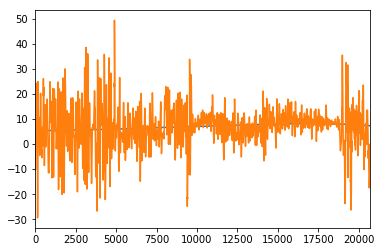

In [17]:
# pd.merge_asof(df, df_lowess, on='unixtime')
#
pd.merge_ordered(df, df_lowess, fill_method='ffill', how='inner')['imar_bias_lowess'].plot()
pd.merge_ordered(df, df_lowess, fill_method='ffill')['imar_bias'].plot()

In [18]:
df = pd.merge_ordered(df, df_lowess, fill_method='ffill', how='inner')
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df.set_index(pd.to_datetime(df['datestring'],unit='s'), inplace=True)
df.head()

,Line,AccBiasX,AccBiasY,AccBiasZ,AccBiasZ_mgal,Corrected_Free_Air_DgS,diff_att_noatt,diff_oib_grav4,diff_oib_grav4_70,diff_oib_grav4_70_clip,...,static_en,static_st,unixtime,UTCDate,x,y,zbias_corr,datestring,imar_bias,imar_bias_lowess
datestring,,,,,,,,,,,,,,,,,,,,,
2017-03-27 11:01:44,D2004,0.001061,-0.000818,0.000148,14.802300,135.075,-6.467250,-4.754357,-5.951157,-5.951157,...,15,10.6,1490612504,2017/03/27,-589235.774464,-1.341858e+06,9.202300,2017-03-27 11:01:44,0.351157,5.306345
2017-03-27 11:01:45,D2004,0.001062,-0.000807,0.000150,15.046800,135.476,-10.193762,-1.134118,-5.434893,-5.434893,...,15,10.6,1490612505,2017/03/27,-589311.512068,-1.341833e+06,9.446630,2017-03-27 11:01:45,-0.165277,5.306425
2017-03-27 11:01:46,D2004,0.001064,-0.000797,0.000151,15.149900,135.846,-12.889311,2.047225,-4.475575,-4.475575,...,15,10.6,1490612506,2017/03/27,-589387.817282,-1.341808e+06,9.549560,2017-03-27 11:01:46,-1.124764,5.306504
2017-03-27 11:01:47,D2004,0.001063,-0.000790,0.000153,15.250299,136.185,-13.240284,2.768039,-3.642870,-3.642870,...,15,10.6,1490612507,2017/03/27,-589464.406190,-1.341782e+06,9.649790,2017-03-27 11:01:47,-1.957640,5.306583
2017-03-27 11:01:48,D2004,0.001063,-0.000784,0.000155,15.533800,136.491,-10.489346,0.086192,-2.936101,-2.936101,...,15,10.6,1490612508,2017/03/27,-589541.265709,-1.341756e+06,9.933121,2017-03-27 11:01:48,-2.664578,5.306662


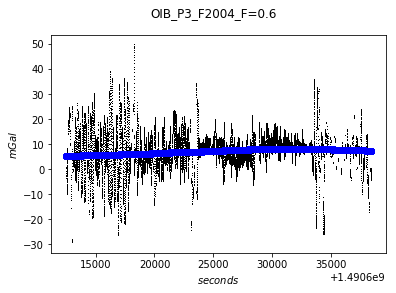

In [46]:
fig, ax = plt.subplots(facecolor='white')
plt.plot(x, y, 'k,')
plt.plot(lowess_x, lowess_y, 'bo')
# plt.plot(xnew, ynew, 'r-')
ax.set_xlabel('$seconds$')
ax.set_ylabel('$mGal$')
# ax.text(1,1, infile[:12] + '_' + str(my_frac))
plt.suptitle(infile[:12] + '_F=' + str(my_frac))
plt.savefig('figs/' + infile[:12] + '_iMARbias-lowess_F=' + str(my_frac) + '.png')

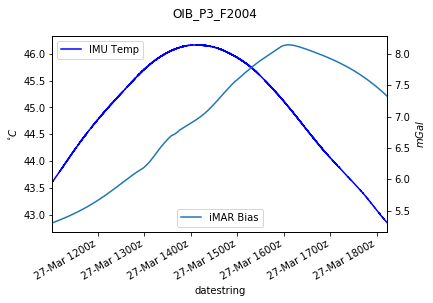

In [47]:
fig, ax = plt.subplots(facecolor='white')
ax2 = ax.twinx()
# # For a third trace
# ax2, ax3 = ax.twinx(), ax.twinx()
# rspine = ax3.spines['right']
# rspine.set_position(('axes', 1.25))
# ax3.set_frame_on(True)
# ax3.patch.set_visible(False)
# fig.subplots_adjust(right=0.75)

ax = df['imu_temp_C'].plot(ax=ax, style='b-', label='IMU Temp')
ax.set_ylabel('$^{\circ}C$')
ax.legend(loc="upper left")
ax2 = df['imar_bias_lowess'].plot(ax=ax2, secondary_y=True, label='iMAR Bias')
ax2.set_ylabel('$mGal$')
ax2.set_xlabel('Time (UTC)')
ax2.legend(loc="lower center")
# df['imar_bias'].plot(ax=ax3, style='g-', alpha=0.2)
# plt.legend([ax, ax2],["Temperature", "iMAR bias"])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H%Mz'))
fig.autofmt_xdate()
plt.suptitle(infile[:12])
plt.savefig('figs/' + infile[:12] + '_iMARbias-vs-IMUtemp.png')

### Shift the IMU temps
First find the offset in peaks (better to do this objectively using CC)

In [21]:
lag_argmax = df['imar_bias_lowess'].argmax() - df['imu_temp_C'].argmax()
print(lag_argmax)

0 days 01:59:33


Test shifting by max offset

In [22]:
# # df['imu_temp_C'].shift(2000).plot(color='blue')
# fig, ax = plt.subplots()
# df['imu_temp_C'].shift(0).plot(color='black')
# df['imu_temp_C'].shift(periods=1, freq=lag_argmax).plot(color='red')
# ax.set_ylabel('$^{\circ}C$')


Text(0,0.5,'$mGal$')

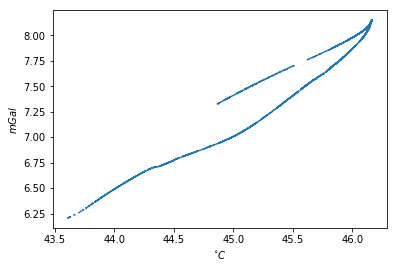

In [48]:
if flight == 4:
    df['imu_temp_C_shift'] = df['imu_temp_C'].shift(periods=1, freq=lag_argmax)
else:
    df['imu_temp_C_shift'] = df['imu_temp_C']

# plt.plot(df['imu_temp_C'].shift(periods=1, freq=lag_argmax), df['imar_bias'])
fig, ax = plt.subplots(facecolor='white')
plt.plot(df['imu_temp_C_shift'], df['imar_bias_lowess'])
ax.set_xlabel('$^{\circ}C$')
ax.set_ylabel('$mGal$')

Text(0,0.5,'$mGal$')

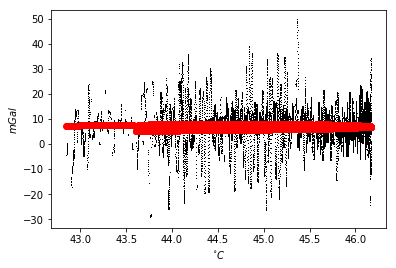

In [49]:
fig, ax = plt.subplots(facecolor='white')
plt.plot(df['imu_temp_C'], df['imar_bias'], 'k,')
plt.plot(df['imu_temp_C'], df['imar_bias_lowess'],'ro')
ax.set_xlabel('$^{\circ}C$')
ax.set_ylabel('$mGal$')

Pandas correlation

In [25]:
# df[['imu_temp_C', 'imar_bias']].corr()
print(df.corr()['imar_bias_lowess'].tail())

y                   0.157715
zbias_corr          0.432474
imar_bias           0.111280
imar_bias_lowess    1.000000
imu_temp_C_shift    0.981180
Name: imar_bias_lowess, dtype: float64


## Linear Regression

In [26]:
import statsmodels.formula.api as smf

# result = sm.ols(formula="A ~ B + C", data=df).fit()
ols = smf.ols(formula="imar_bias_lowess ~ imu_temp_C_shift", data=df).fit()
print(ols.summary())
ols.save('ols_results_F200' + str(flight) + '.pickle')

                            OLS Regression Results                            
Dep. Variable:       imar_bias_lowess   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 3.298e+05
Date:                Fri, 25 May 2018   Prob (F-statistic):               0.00
Time:                        16:37:02   Log-Likelihood:                 10354.
No. Observations:               12777   AIC:                        -2.070e+04
Df Residuals:                   12775   BIC:                        -2.069e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -26.7693      0.060  

In [27]:
import statsmodels.formula.api as smf

# 2nd order polynomial
poly_2 = smf.ols('imar_bias ~ 1 + imu_temp_C_shift + I(imu_temp_C_shift ** 2.0)', data=df).fit()
print(poly_2.summary())
poly_2.save('poly_2_results_F200' + str(flight) + '.pickle')

                            OLS Regression Results                            
Dep. Variable:              imar_bias   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     103.1
Date:                Fri, 25 May 2018   Prob (F-statistic):           3.95e-45
Time:                        16:37:02   Log-Likelihood:                -41826.
No. Observations:               12777   AIC:                         8.366e+04
Df Residuals:                   12774   BIC:                         8.368e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [28]:
import statsmodels.formula.api as smf

# 2nd order polynomial
poly_3 = smf.ols('imar_bias ~ 1 \
                + imu_temp_C_shift \
                + I(imu_temp_C_shift ** 2.0) \
                + I(imu_temp_C_shift ** 3.0)', 
                 data=df).fit()
print(poly_3.summary())

                            OLS Regression Results                            
Dep. Variable:              imar_bias   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     180.9
Date:                Fri, 25 May 2018   Prob (F-statistic):          7.03e-115
Time:                        16:37:02   Log-Likelihood:                -41662.
No. Observations:               12777   AIC:                         8.333e+04
Df Residuals:                   12773   BIC:                         8.336e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

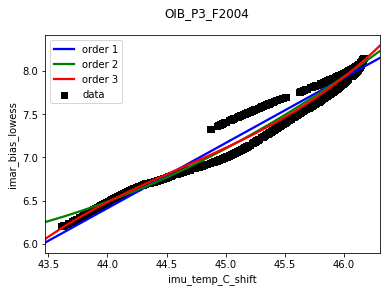

In [50]:
import seaborn as sns
fig, ax = plt.subplots(facecolor='white')
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(df['imu_temp_C_shift'], df['imar_bias_lowess'], label='data', color='black', marker=',')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='imu_temp_C_shift', y='imar_bias_lowess', data=df, 
            order=1, 
            color='blue', scatter=None, label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='imu_temp_C_shift', y='imar_bias_lowess', data=df, 
            order=2, 
            color='green', scatter=None, label='order 2')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='imu_temp_C_shift', y='imar_bias_lowess', data=df, 
            order=3, 
            color='red', scatter=None, label='order 3')
plt.legend()
plt.suptitle(infile[:12])
plt.savefig('figs/' + infile[:12] + '_test_regression_order3.png')

## Load OLS results from another flight

In [30]:
correction = ols.predict(pd.DataFrame({'intercept': 1,
                             'imu_temp_C_shift': df['imu_temp_C_shift'].values}))
df['imar_adjusted_auto'] = df['grav_4_70_corr'] - correction.values
#
new_poly = sm.load('poly2_results_650b.pickle')
new_ols = sm.load('ols_results_650b.pickle')
print(new_ols.model.formula)
correction = new_ols.predict(pd.DataFrame({'intercept': 1,
                             'temp': df['imu_temp_C_shift'].values}))
df['imar_adjusted_650b'] = df['grav_4_70_corr'] - correction.values
#
new_poly = sm.load('poly_2_results_F2004.pickle')
new_ols = sm.load('ols_results_F2004.pickle')
print(new_ols.model.formula)
correction = new_ols.predict(pd.DataFrame({'intercept': 1,
                             'imu_temp_C_shift': df['imu_temp_C_shift'].values}))
df['imar_adjusted_F2004'] = df['grav_4_70_corr'] - correction.values
#
new_poly = sm.load('poly_2_results_OIB-P3_ALL.pickle')
new_ols = sm.load('ols_results_OIB-P3_ALL.pickle')
print(new_ols.model.formula)
print(new_poly.model.formula)
print(new_ols.summary())
correction = new_ols.predict(pd.DataFrame({'intercept': 1,
                             'imu_temp_C': df['imu_temp_C_shift'].values}))
df['imar_adjusted_ALL'] = df['grav_4_70_corr'] - correction.values

imar_bias_lowess ~ temp
imar_bias_lowess ~ imu_temp_C_shift
imar_bias_lowess ~ imu_temp_C
imar_bias_lowess ~ 1 + imu_temp_C + I(imu_temp_C ** 2.0)
                            OLS Regression Results                            
Dep. Variable:       imar_bias_lowess   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                 3.401e+04
Date:                Fri, 25 May 2018   Prob (F-statistic):               0.00
Time:                        16:37:07   Log-Likelihood:            -1.0232e+05
No. Observations:               57483   AIC:                         2.046e+05
Df Residuals:                   57481   BIC:                         2.047e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

In [31]:
# correction = ols.predict(pd.DataFrame({'intercept': 1,
#                              'imu_temp_C_shift': df['imu_temp_C_shift'].values}))
# df['imar_adjusted_o2'] = df['grav_4_70_corr'] - correction.values
# print(len(correction))
# correction.plot()

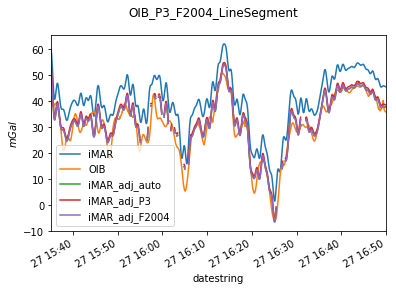

In [51]:
fig, ax = plt.subplots(facecolor='white')
ln1 = df['grav_4_70_corr'].loc[begin_line: end_line].plot(label='iMAR')
ln2 = df['oib_10_11_12'].loc[begin_line: end_line].plot(label='OIB')
ln3 = df['imar_adjusted_auto'].loc[begin_line: end_line].plot(label='iMAR_adj_auto')
ln3 = df['imar_adjusted_ALL'].loc[begin_line: end_line].plot(label='iMAR_adj_P3')
ln4 = df['imar_adjusted_F2004'].loc[begin_line: end_line].plot(label='iMAR_adj_F2004')
# ln5 = df['imar_adjusted_650b'].loc[begin_line: end_line].plot(label='iMAR_adj_650b')
ax.set_ylabel('$mGal$')
plt.legend()
plt.suptitle(infile[:12] + '_LineSegment')
plt.savefig('figs/' + infile[:12] + '_Grav_iMAR-vs-OIB_LineSegment.png')

In [33]:
df['imar_bias_new_ALL'] = df['imar_adjusted_ALL'] - df['oib_10_11_12']
df['imar_bias_new_F2004'] = df['imar_adjusted_F2004'] - df['oib_10_11_12']
df['imar_bias_new_auto'] = df['imar_adjusted_auto'] - df['oib_10_11_12']
df[['imar_bias_new_ALL', 'imar_bias_new_F2004', 'imar_bias_new_auto', 'imar_bias']].describe()

,imar_bias_new_ALL,imar_bias_new_F2004,imar_bias_new_auto,imar_bias
count,12777.000000,12777.000000,12777.000000,20691.000000
mean,0.811694,-0.228725,-0.228725,6.887860
std,6.393484,6.397507,6.397507,8.124357
min,-33.207582,-34.138277,-34.138277,-29.460076
25%,-2.019732,-3.101909,-3.101909,2.984927
50%,1.103023,0.133051,0.133051,7.478846
75%,3.990963,2.983958,2.983958,11.017470
max,28.493505,27.591666,27.591666,49.404441


/Users/dporter/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


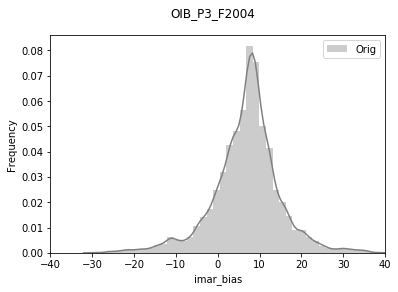

In [52]:
fig, ax = plt.subplots(facecolor='white')
# ax = sns.distplot(df['imar_bias_new'], rug=True, hist=False)
# ax = sns.distplot(df['imar_bias_new_ALL'], kde=True, color='red', label='P3_ALL')
# ax = sns.distplot(df['imar_bias_new_F2004'], kde=True, color='blue', label='P3_F2004')
# ax = sns.distplot(df['imar_bias_new_auto'], kde=True, color='green', label='P3_auto')
ax = sns.distplot(df['imar_bias'], kde=True, color='grey', label='Orig')
ax.set_xlim([-40, 40])
ax.set_ylabel('Frequency')
plt.legend()
plt.suptitle(infile[:12])
plt.savefig('figs/' + infile[:12] + '_PFD_compare_iMAR_adjusted_bias.png')

In [35]:
df.to_csv('data/P3_2017/LGS/' + infile[:12] + '_TempComp_v1.csv', na_rep='*')
# nans?